## <center> Ensemble Modeling
### <center> Problem Statement : For a given dataset which is the best classification algorithm(as per accuracy)
### <center> Dataset : 'fake_job_postings.csv'

    

## Importing Libraries


In [3]:
#Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
#Reading csv file of dataset
df = pd.read_csv("D:\Datasets\job postings.csv")
df.head()   

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploring dataset

In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
##Info about the data shape of data, type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(17880, 18)

## Feature Selection

In [9]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [10]:
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

## Check for missing values and outliers

In [11]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
False,17880.0,17534,14572,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,2868,17880.0
True,NaN,346,3308,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,15012,NaN


In [12]:
#Check for number of null values
df.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [13]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

493

In [14]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

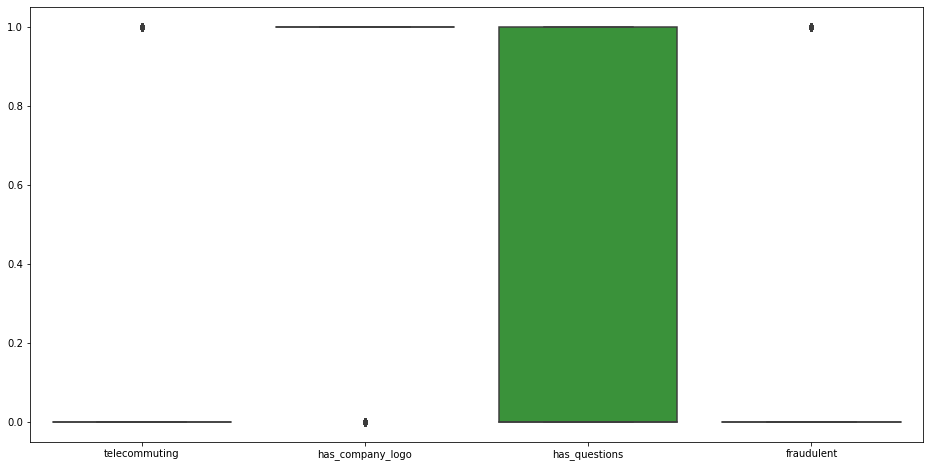

In [17]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

- Columns 'telecommuting', 'has_company_logo' ,'fradulent' has minimal outliers.

## Removing Outliers

In [18]:
#Removing Outliers from columns
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [19]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [20]:
df.dropna(axis= 0, how= 'any', inplace=True)

In [21]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [22]:
df.shape

(1485, 14)

- Outliers and missing values has been removed.

## Creating Visual methods to analyze data

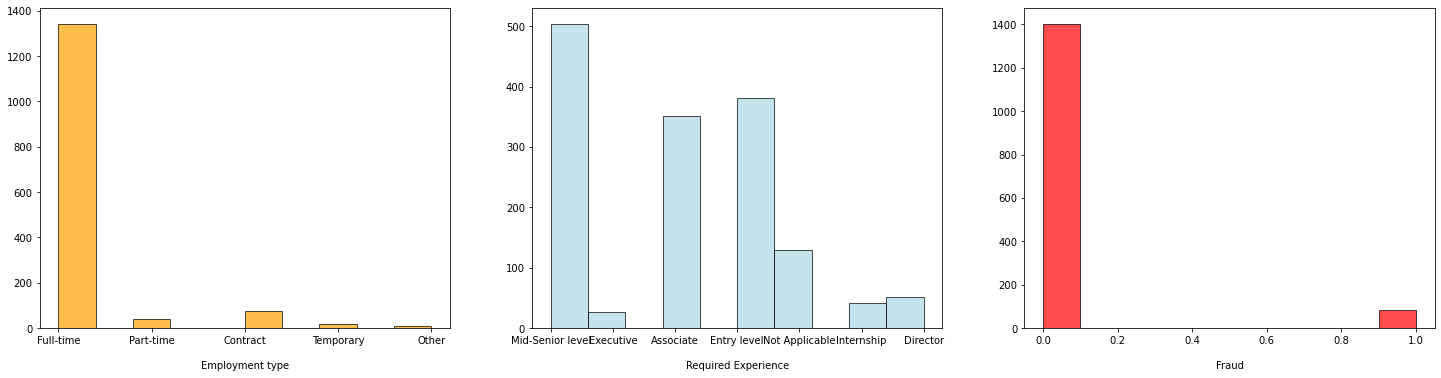

In [23]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')


plt.show()

- Full-time jobs are posted more comparatively to other type of employment.
- There are more jobs available that requires Mid-senior level Experience.

<AxesSubplot:xlabel='function', ylabel='count'>

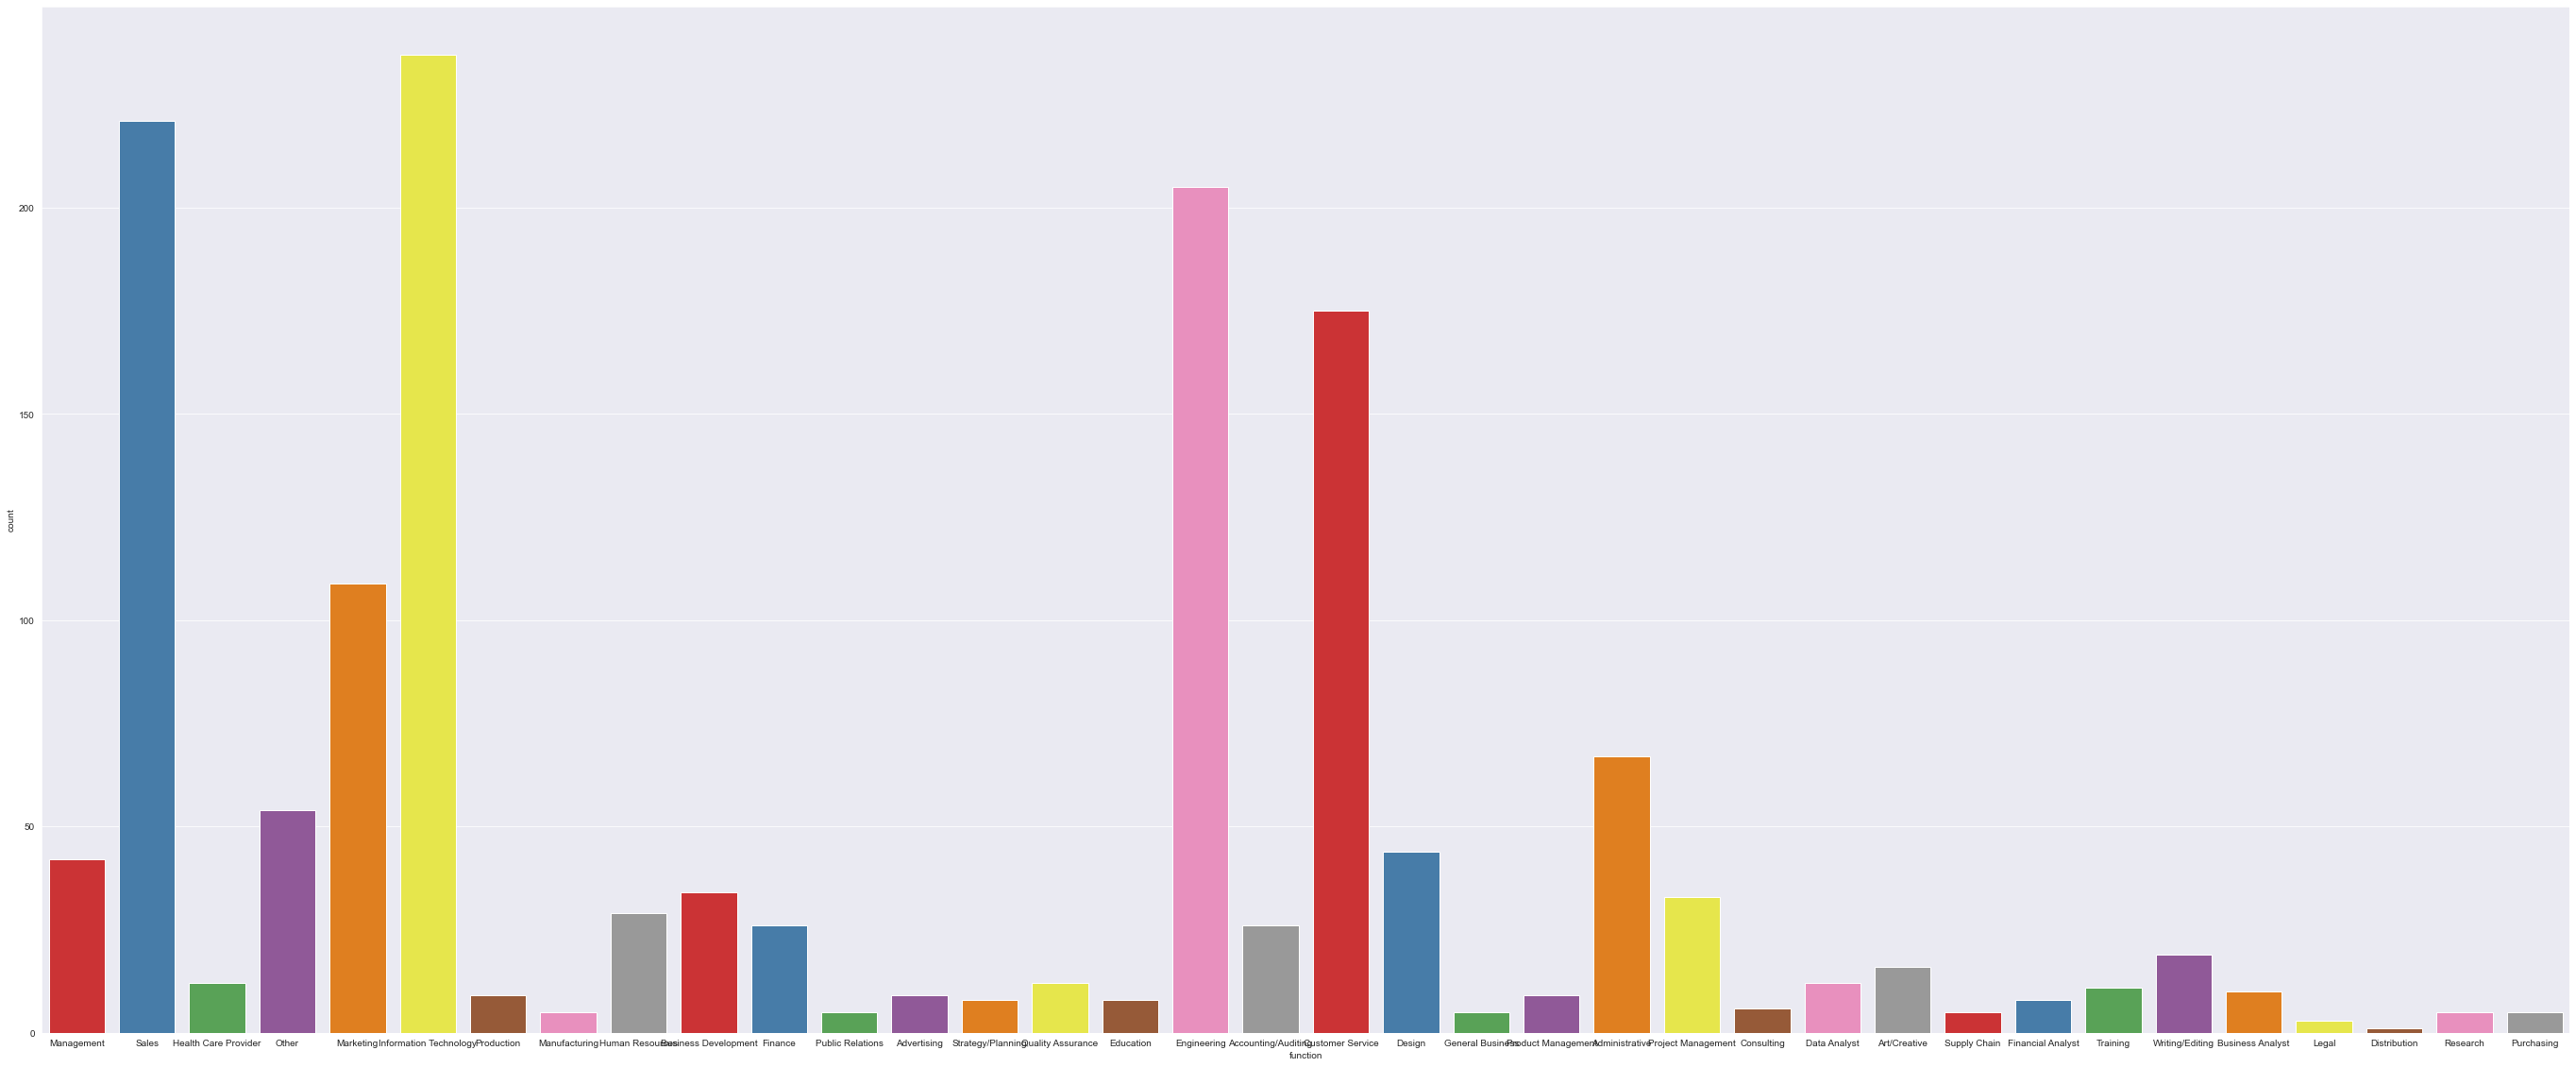

In [24]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

- There are maximum number of jobs are posted in IT field and minimum jobs are posted related to Distribution.
- Jobs in Sales,IT,Marketing,Engineering,Customer Service,Administrative are most in demand jobs.

## Que 1: Which is the job titles have most full time job opportunities and how many?

In [25]:
#Subsetting dataframe which have 'Full-time' emplyment type and also are not fruad.
df_jobs = df[(df['employment_type'] == 'Full-time') & (df['fraudulent']== 0)]

In [26]:
df_jobs.shape

(1269, 14)

In [27]:
#Checking the counts of each unique value
df_jobs['title'].value_counts()

Agent-Inbound Sales Position                                    12
Marketing Manager                                                8
Customer Service Representative                                  8
Web Developer                                                    7
Technical Support Associate                                      7
                                                                ..
Stock Administrator Job opportunity at California,Santa Rosa     1
Director of Sales - Weave The People                             1
Office & Travel Manager (30h part-time or full-time)             1
Product Manager (Multiple Openings)                              1
Level 1 Tech Support Specialist                                  1
Name: title, Length: 1027, dtype: int64

In [28]:
df_jobs['title'].value_counts().max()

12

### Ans 1 : Job title 'Agent-Inbound Sales Position' has 12 opportunities for a full time job.

In [29]:
df.head(1)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
6,Head of Content (m/f),"DE, BE, Berlin","Founded in 2009, the Fonpit AG rose with its i...",Your Know-How: ...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,20000-28000,0


## Que 2 : Which industry have the maximum number of fake job postings?

In [30]:
#Only including rows which are fake job postings.
df_industry = df[df['fraudulent']== 1]

In [31]:
df_industry.shape

(82, 14)

In [32]:
#Checking each unique value counts of industry.
df_industry['industry'].value_counts()

Oil & Energy                            19
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Retail                                   4
Management Consulting                    3
Accounting                               2
Insurance                                2
Telecommunications                       2
Hospitality                              2
Hospital & Health Care                   2
Biotechnology                            2
Transportation/Trucking/Railroad         2
Human Resources                          2
Defense & Space                          1
Logistics and Supply Chain               1
Mechanical or Industrial Engineering     1
Computer Networking                      1
Construction                             1
Warehousing                              1
Military                                 1
Media Production                         1
Security an

## Ans 2 : Industry with, maximum no. of fake job postings : Oil & energy
                   

**************************

## Balancing dataset

- We have performed Explorartory Data Analysis on dataset,now we need to check if our dataset is balanced or not.
- Unbalanced dataset can lead to biased results for our model.

In [33]:
df['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

- As we can see,we have very imbalanced dataset, need to balance it first and then train our model.

-
-> Separete fraudulent and non fraudulent dataframes:

In [34]:
df['fraudulent'].values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

In [36]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(1403, 14)

- we can oversample 'fraud' dataframe in order to get balanced dataset. 

In [37]:
fraud = fraud.sample(1403, replace=True)

In [38]:
fraud.shape, not_fraud.shape

((1403, 14), (1403, 14))

###### Now our dataset is balanced:)

In [39]:
df = fraud.append(not_fraud)
df.reset_index()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,17760,Payroll Clerk,"US, DC,","DRS Technologies, headquartered in Arlington, ...",- Overtime may be required occasionally.- High...,0,0,0,Full-time,Entry level,High School or equivalent,Electrical/Electronic Manufacturing,Financial Analyst,53000-67000,1
1,2750,Administrative Assistant,"US, TX, Dallas","AZCO INC. is an employee-owned, full service i...",Minimum of one year administrative assistant e...,0,1,0,Contract,Entry level,Bachelor's Degree,Construction,Administrative,20000-30000,1
2,1494,JOB VACANCIES AT MONTCALM LUXURY HOTEL LONDON.,"GB, EAW, London",Welcome To The Montcalm... A Luxury Hotel Loca...,*Associate or Bachelors Degree from a reputabl...,0,1,0,Full-time,Entry level,Certification,Hospitality,Management,2500-3500,1
3,9878,IC&E Technician,"US, , Stocton, CA",DTE Energy and Refined Resources have partnere...,"Knowledge, Skills &amp; Abilities:A high schoo...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,95000-115000,1
4,16861,Quality Engineer,"US, MA, New England",Maynard Consulting Company has more than 20 ye...,BS degree in Engineering or Technical Field or...,0,1,1,Contract,Mid-Senior level,Bachelor's Degree,Biotechnology,Accounting/Auditing,40000-90000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,17439,Senior Trusts Manager,"GB, LND, Kingston upon Thames",VSO brings people together to fight poverty by...,The applicantVSO is looking for an individual ...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,International Trade and Development,Business Development,39000-41000,0
2802,17488,Management Accountant,"NZ, N, Auckland",PowerbyProxi and its customers are leading a r...,"Reporting to the CFO, the Management Accountan...",0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,100000-110000,0
2803,17515,Marketing manager,"GR, B, Thessaloniki",A vacation rental platform that will re-invent...,Perfect use of English and Greek language. Soc...,0,1,0,Part-time,Associate,Bachelor's Degree,"Leisure, Travel & Tourism",Marketing,5000-7000,0
2804,17849,Communication Designer,"US, CA, San Francisco",Balanced Labs exists to provide accountants an...,"Specifically, we’re looking for:5+ years of vi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,80000-100000,0


- We have so much categorical data, so we need to convert it to numerical data.
- To do so, we perform LabelEncoding.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [42]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,17760,764,265,104,24,0,0,0,1,2,4,26,14,397,1
1,2750,41,401,15,636,0,1,0,0,2,1,17,1,176,1
2,1494,3,64,406,8,0,1,0,1,2,2,40,20,218,1
3,9878,497,222,105,599,0,1,1,1,5,4,63,23,501,1
4,16861,840,316,229,243,0,1,1,0,5,1,6,0,335,1


### Split dataset into training and testing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [46]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2104, 14), (702, 14), (2104, 1), (702, 1))

### 3) Random Forest Algorithm

#### Train the Model:

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=5)

In [65]:
rfc.fit(X_train, Y_train)

<ipython-input-65-96e8a0ce9cd3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5)

#### Test the Model:

In [66]:
Y_pred = rfc.predict(X_test)

In [67]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [68]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
697,1,1
698,0,0
699,1,1
700,0,0


#### Check Accuracy Score:

In [69]:
accuracy_score(Y_pred,Y_test)

1.0